# Trabalho 2 - SVD e recomendação de filmes.         Nícolas Hecker Silva         RA: 186132

A primeira parte importante desse trabalho é baixar as dependencias necessárias usando pip, caso a máquina não as possua. Para isso usamos o código abaixo:

In [1]:
# instalar dependencias
!python -m pip install pandas
!python -m pip install jax
!python -m pip install --upgrade "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!python -m pip install scikit-learn
!python -m pip install matplotlib


Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


# Implementação do SVD:

Através das funções de autovetores e autovalores e comparando com a função própria.

primeiro função própria do jax e do numpy

In [2]:
import jax.numpy as jnp

matrix = jnp.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

U, S, VT = jnp.linalg.svd(matrix, full_matrices=True)

print("Autovetores U:\n", U)
print("Autovalores:\n",S)
print("Autovetores VT:\n",VT)

print("\n================================== Agora com numpy ===========================================\n")
import numpy as np
matriz = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
Un, Sn, VTn = np.linalg.svd(matriz, full_matrices=True)

print("Autovetores U:\n", Un)
print("Autovalores:\n",Sn)
print("Autovetores VT:\n",VTn)


Autovetores U:
 [[ 0.14087664  0.82471395  0.46999776  0.2812515 ]
 [ 0.34394628  0.42626432 -0.8362956  -0.02468661]
 [ 0.5470158   0.02781341  0.2625992  -0.7943813 ]
 [ 0.75008535 -0.37063694  0.10369895  0.5378164 ]]
Autovalores:
 [2.5462400e+01 1.2906601e+00 2.8028271e-07]
Autovetores VT:
 [[ 0.5045332   0.5745157   0.64449817]
 [-0.7607754  -0.05714092  0.64649487]
 [ 0.40824872 -0.81649655  0.40824792]]

================================== Agora com numpy ===========================================

Autovetores U:
 [[-0.14087668 -0.82471435  0.54704904 -0.02715407]
 [-0.34394629 -0.42626394 -0.70915928  0.4439517 ]
 [-0.54701591 -0.02781353 -0.22282857 -0.80644121]
 [-0.75008553  0.37063688  0.38493881  0.38964357]]
Autovalores:
 [2.54624074e+01 1.29066168e+00 1.80972823e-15]
Autovetores VT:
 [[-0.50453315 -0.5745157  -0.64449826]
 [ 0.76077568  0.05714052 -0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]


2024-10-13 18:50:28.454172: W external/xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.6.68. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [3]:
SL = matrix @ matrix.T
SR = matrix.T @ matrix

print("Matriz esquerda:\n",SL)
print("Matriz direita:\n",SR)
    
s1,u = jnp.linalg.eigh(SL)
s2,v = jnp.linalg.eigh(SR)

# se módulo menor que 1e-5, considera zero. Também tira a raiz quadrada
s1 = jnp.where(jnp.abs(s1) < 1e-5, 0, s1)**0.5
s2 = jnp.where(jnp.abs(s2) < 1e-5, 0, s2)**0.5

print("Autovetores esquerda:\n",u)
print("Autovetores direita:\n",v)
print("Autovalores S1:\n",s1)
print("Autovalores S2:\n",s2)

Matriz esquerda:
 [[ 14  32  50  68]
 [ 32  77 122 167]
 [ 50 122 194 266]
 [ 68 167 266 365]]
Matriz direita:
 [[166 188 210]
 [188 214 240]
 [210 240 270]]
Autovetores esquerda:
 [[-0.34394345  0.42626652  0.82471424  0.14087665]
 [ 0.14087537 -0.8247139   0.42626527  0.34394637]
 [ 0.7500866   0.37063494  0.02781123  0.5470159 ]
 [-0.5470166   0.02781428 -0.37063578  0.7500856 ]]
Autovetores direita:
 [[ 0.40824673 -0.7607764   0.50453305]
 [-0.8164966  -0.05713892  0.5745157 ]
 [ 0.4082495   0.6464938   0.6444983 ]]
Autovalores S1:
 [ 0.         0.         1.2906629 25.46241  ]
Autovalores S2:
 [ 0.         1.2906607 25.462406 ]


In [4]:
# obtem os indices para que ordenam os autovalores
idx1 = jnp.argsort(s1)[::-1]
idx2 = jnp.argsort(s2)[::-1]

# ordena os autovalores e autovetores
s1 = s1[idx1]
s2 = s2[idx2]

u = u[:,idx1]
v = v[:,idx2]

print("Autovetores esquerda ordenados:\n",u)
print("Autovetores direita ordenados transposto:\n",v.T)
print("Autovalores S1 ordenados:\n",s1)
print("Autovalores S2 ordenados:\n",s2)

print("\n ==================== comapração com SVD nativo =====================\n")

print("Autovetores U:\n", U)
print("Autovalores:\n",jnp.where(jnp.abs(S) < 1e-5, 0, S))
print("Autovetores VT:\n",VT)



Autovetores esquerda ordenados:
 [[ 0.14087665  0.82471424  0.42626652 -0.34394345]
 [ 0.34394637  0.42626527 -0.8247139   0.14087537]
 [ 0.5470159   0.02781123  0.37063494  0.7500866 ]
 [ 0.7500856  -0.37063578  0.02781428 -0.5470166 ]]
Autovetores direita ordenados transposto:
 [[ 0.50453305  0.5745157   0.6444983 ]
 [-0.7607764  -0.05713892  0.6464938 ]
 [ 0.40824673 -0.8164966   0.4082495 ]]
Autovalores S1 ordenados:
 [25.46241    1.2906629  0.         0.       ]
Autovalores S2 ordenados:
 [25.462406   1.2906607  0.       ]

 ==================== comapração com SVD nativo =====================

Autovetores U:
 [[ 0.14087664  0.82471395  0.46999776  0.2812515 ]
 [ 0.34394628  0.42626432 -0.8362956  -0.02468661]
 [ 0.5470158   0.02781341  0.2625992  -0.7943813 ]
 [ 0.75008535 -0.37063694  0.10369895  0.5378164 ]]
Autovalores:
 [25.4624     1.2906601  0.       ]
Autovetores VT:
 [[ 0.5045332   0.5745157   0.64449817]
 [-0.7607754  -0.05714092  0.64649487]
 [ 0.40824872 -0.81649655  0.

In [5]:
def svd(matrix):
    SL = matrix @ matrix.T
    SR = matrix.T @ matrix

    s1,u = jnp.linalg.eigh(SL)
    s2,v = jnp.linalg.eigh(SR)

    # se módulo menor que 1e-5, considera zero. Também tira a raiz quadrada
    s1 = jnp.where(jnp.abs(s1) < 1e-5, 0, s1)**0.5
    s2 = jnp.where(jnp.abs(s2) < 1e-5, 0, s2)**0.5

    # obtem os indices para que ordenam os autovalores
    idx1 = jnp.argsort(s1)[::-1]
    idx2 = jnp.argsort(s2)[::-1]

    # ordena os autovalores e autovetores
    s1 = s1[idx1]
    s2 = s2[idx2]

    u = u[:,idx1]
    v = v[:,idx2]

    return u,s1,v.T

u, s, vt = svd(matrix)
print("Autovetores U:\n", u)
print("Autovalores:\n",s)
print("Autovetores VT:\n",vt)

print("\n================================== Última comparação com o oficial ===========================================\n")

print("Autovetores U:\n", U)
print("Autovalores:\n",jnp.where(jnp.abs(S) < 1e-5, 0, S))
print("Autovetores VT:\n",VT)

Autovetores U:
 [[ 0.14087665  0.82471424  0.42626652 -0.34394345]
 [ 0.34394637  0.42626527 -0.8247139   0.14087537]
 [ 0.5470159   0.02781123  0.37063494  0.7500866 ]
 [ 0.7500856  -0.37063578  0.02781428 -0.5470166 ]]
Autovalores:
 [25.46241    1.2906629  0.         0.       ]
Autovetores VT:
 [[ 0.50453305  0.5745157   0.6444983 ]
 [-0.7607764  -0.05713892  0.6464938 ]
 [ 0.40824673 -0.8164966   0.4082495 ]]

================================== Última comparação com o oficial ===========================================

Autovetores U:
 [[ 0.14087664  0.82471395  0.46999776  0.2812515 ]
 [ 0.34394628  0.42626432 -0.8362956  -0.02468661]
 [ 0.5470158   0.02781341  0.2625992  -0.7943813 ]
 [ 0.75008535 -0.37063694  0.10369895  0.5378164 ]]
Autovalores:
 [25.4624     1.2906601  0.       ]
Autovetores VT:
 [[ 0.5045332   0.5745157   0.64449817]
 [-0.7607754  -0.05714092  0.64649487]
 [ 0.40824872 -0.81649655  0.40824792]]


In [6]:
# get the dataset of https://files.grouplens.org/datasets/movielens/ml-100k.zip if not exists
import os
if not os.path.exists('dataset-t2/ml-100k'):
    !wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
    !unzip ml-100k.zip -d dataset-t2/
    # remove the zip file
    !rm ml-100k.zip

Os conjuntos preprocessados, possuem todos os sujeitos no treino. Entretanto isso não é interessante para a tarefa, uma vez que queremos prever as avaliacoes para um novo sujeito. Logo, precisamos fazer nosso próprio particionamento.

In [7]:
# carrega com pandas o dataset u1 separado por tabs
import pandas as pd

# carrega o dataset de avaliações
complete = pd.read_csv('dataset-t2/ml-100k/u.data', sep='\t', header=None)
complete.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

complete_array = complete.pivot(index='user_id', columns='movie_id', values='rating').fillna(0).values

print(complete.info())

print(complete_array.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
(943, 1682)


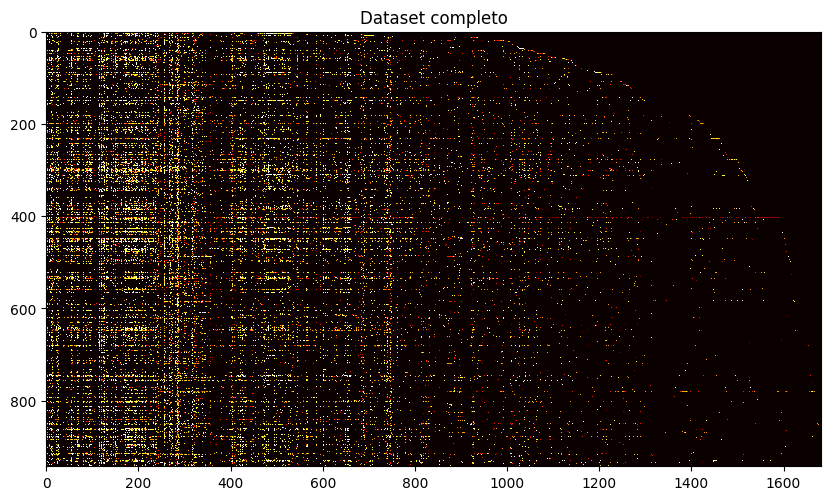

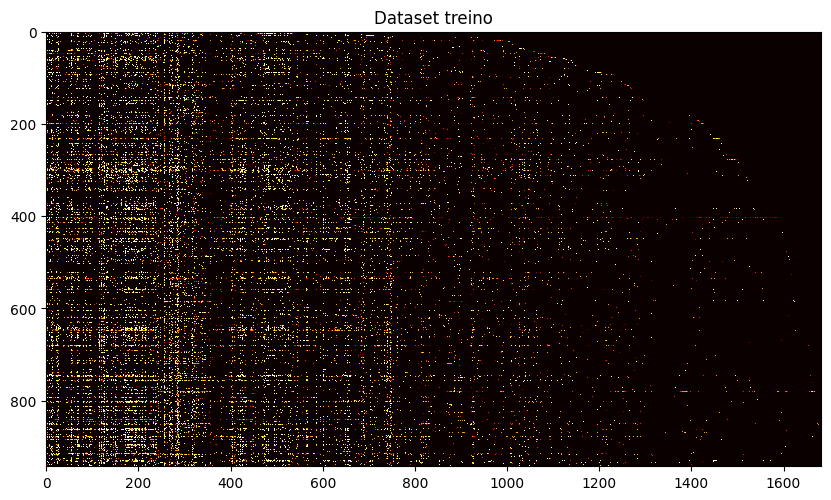

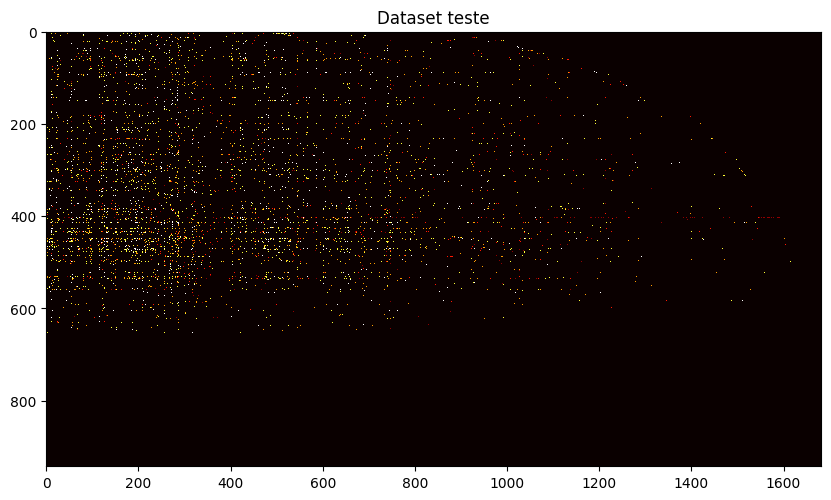

In [8]:
# carrega o dataset de avaliações particionado em 20 80 u1
u1_test_raw = pd.read_csv('dataset-t2/ml-100k/u2.test', sep='\t', header=None)
u1_test_raw.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

train_array = complete_array.copy()

# mostra o dataset completo
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Dataset completo')
plt.imshow(train_array, cmap='hot', interpolation='nearest')
plt.show()

# remove os valores de teste do dataset completo
for index, row in u1_test_raw.iterrows():
    train_array[row['user_id']-1,row['movie_id']-1] = 0

plt.figure(figsize=(10,10))
plt.title("Dataset treino")
plt.imshow(train_array, cmap='hot', interpolation='nearest')
plt.show()

# mostra a subtração dos dois datasets
test_array = complete_array - train_array
plt.figure(figsize=(10,10))
plt.title("Dataset teste")
plt.imshow(test_array, cmap='hot', interpolation='nearest')
plt.show()




(943, 943) (943,) (943, 1682)


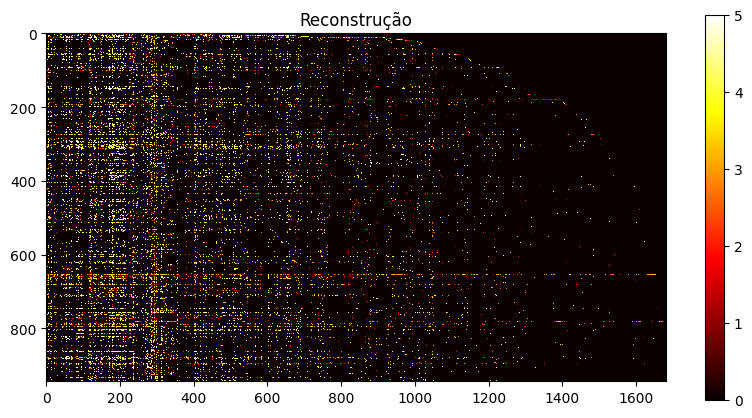

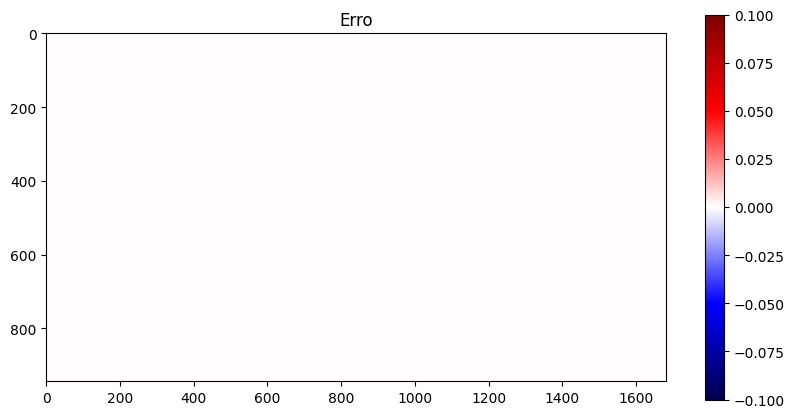

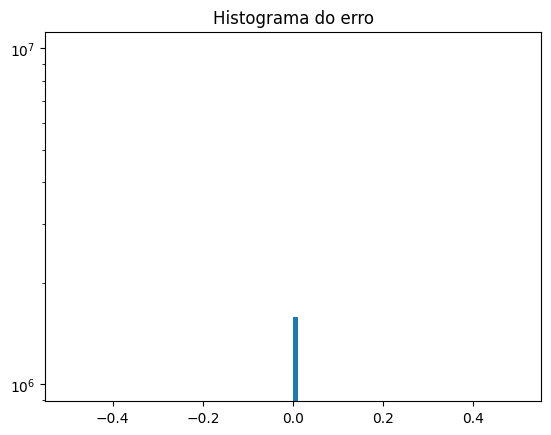

[-0.]


In [39]:
# calcula a SVD da matriz de treino
U, S, VT = jnp.linalg.svd(train_array, full_matrices=False)
print(U.shape, S.shape, VT.shape)

# tenta reconstruir a matriz original
reconstructed = U @ jnp.diag(S) @ VT

# mostra o reconstructed
plt.figure(figsize=(10, 5))
plt.title("Reconstrução")
plt.imshow(reconstructed, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

erro = train_array - reconstructed

# aproxima os valores para o inteiro mais próximo (para ignorar erros numericos)
erro = jnp.round(erro)

# mostra o erro
plt.figure(figsize=(10, 5))
plt.title("Erro")
plt.imshow(erro, cmap='seismic', interpolation='nearest')
plt.colorbar()
plt.show()

# mostra o erro como histograma
plt.hist(erro.flatten(), bins=100)
plt.title("Histograma do erro")
# escala log
plt.yscale('log')
plt.show()

# mostra os erros (unicos)
print(jnp.unique(erro))


(943, 943) (943,) (1682, 1682)


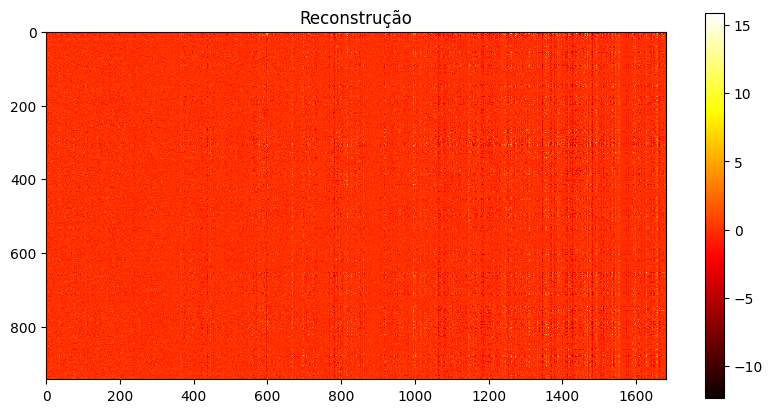

In [47]:
u, s, vT = svd(train_array)
print(u.shape, s.shape, vT.shape)

# tenta reconstruir a matriz original
reconstructed = u @ jnp.diag(s) @ vT[:u.shape[0],:]

# mostra o reconstructed
plt.figure(figsize=(10, 5))
plt.title("Reconstrução")
plt.imshow(reconstructed, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



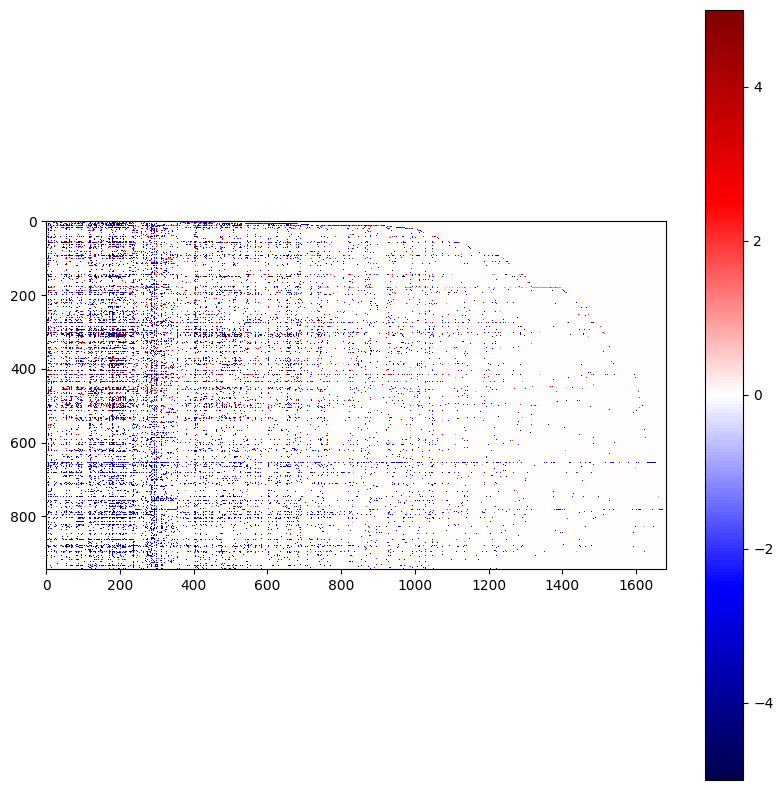

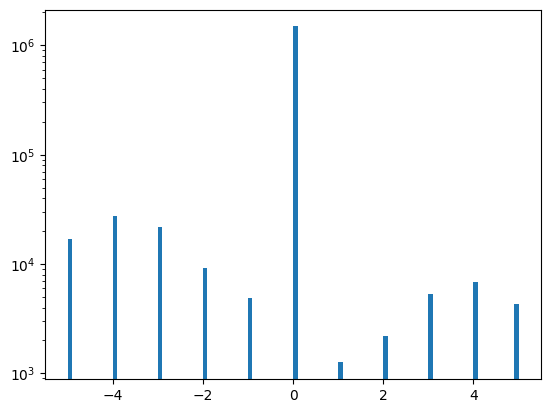

[-5. -4. -3. -2. -1. -0.  1.  2.  3.  4.  5.]


In [10]:
erro = test_array - reconstructed

# aproxima os valores para o inteiro mais próximo (para ignorar erros numericos)
erro = jnp.round(erro)

# mostra o erro
plt.figure(figsize=(10, 10))
plt.imshow(erro, cmap='seismic', interpolation='nearest')
plt.colorbar()
plt.show()

# mostra o erro como histograma
plt.hist(erro.flatten(), bins=100)
# escala log
plt.yscale('log')
plt.show()

# mostra os erros (unicos)
print(jnp.unique(erro))


Visualizando os autovetores e autovalores

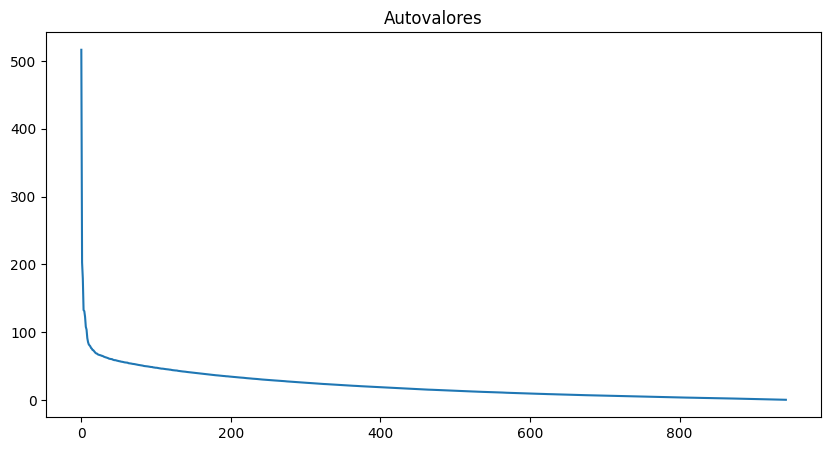

In [11]:
# plota os autovalores S
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(S)
plt.title("Autovalores")
plt.show()

Text(0.5, 1.0, 'Autovalores')

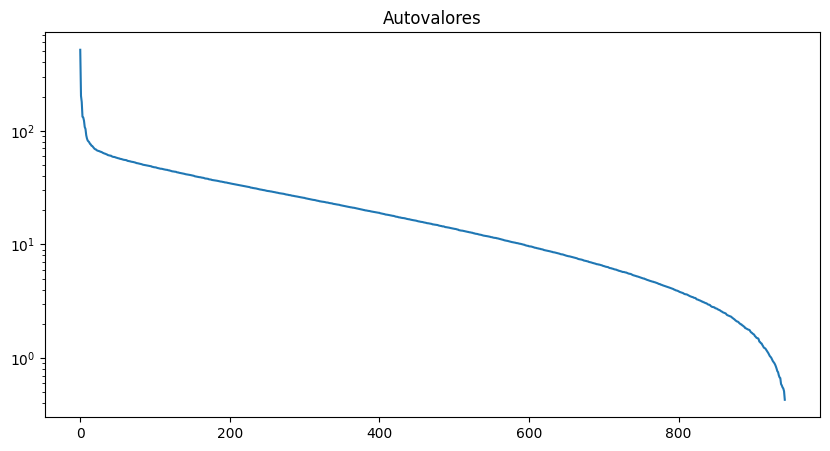

In [12]:
# plota novamente em escala loagaritmica
plt.figure(figsize=(10,5))
plt.plot(S)
plt.yscale('log')
plt.title("Autovalores")

Text(0.5, 1.0, 'Autovalores')

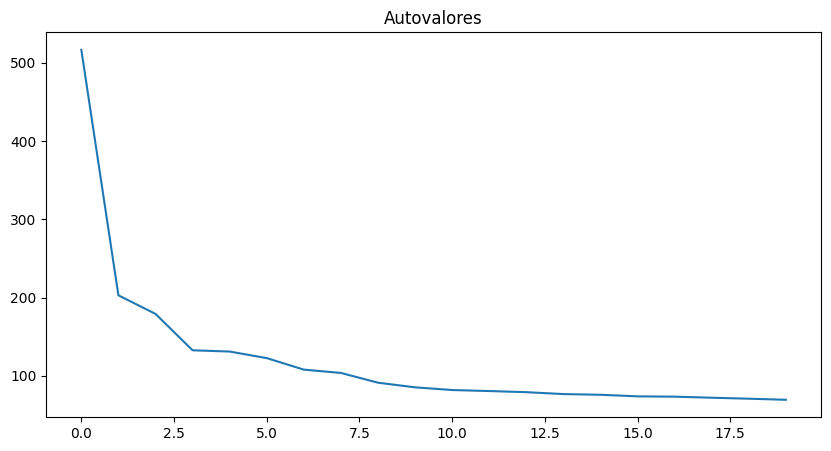

In [13]:
# plota novamente em escala loagaritmica
plt.figure(figsize=(10,5))
plt.plot(S[:20])
plt.title("Autovalores")

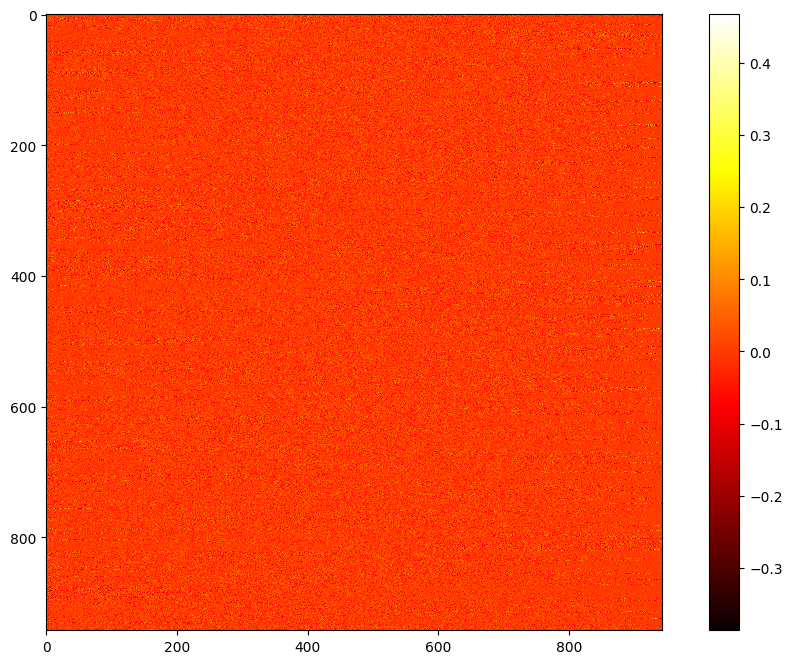

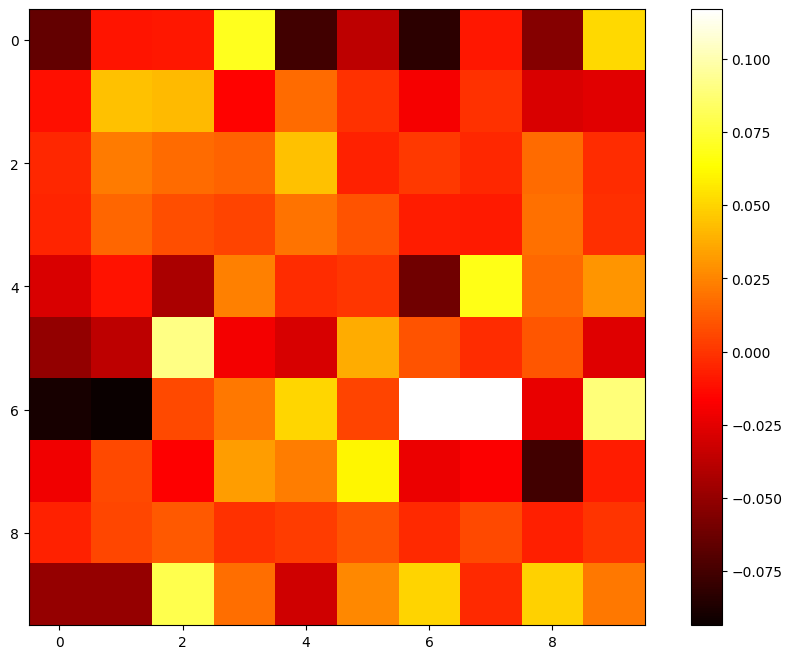

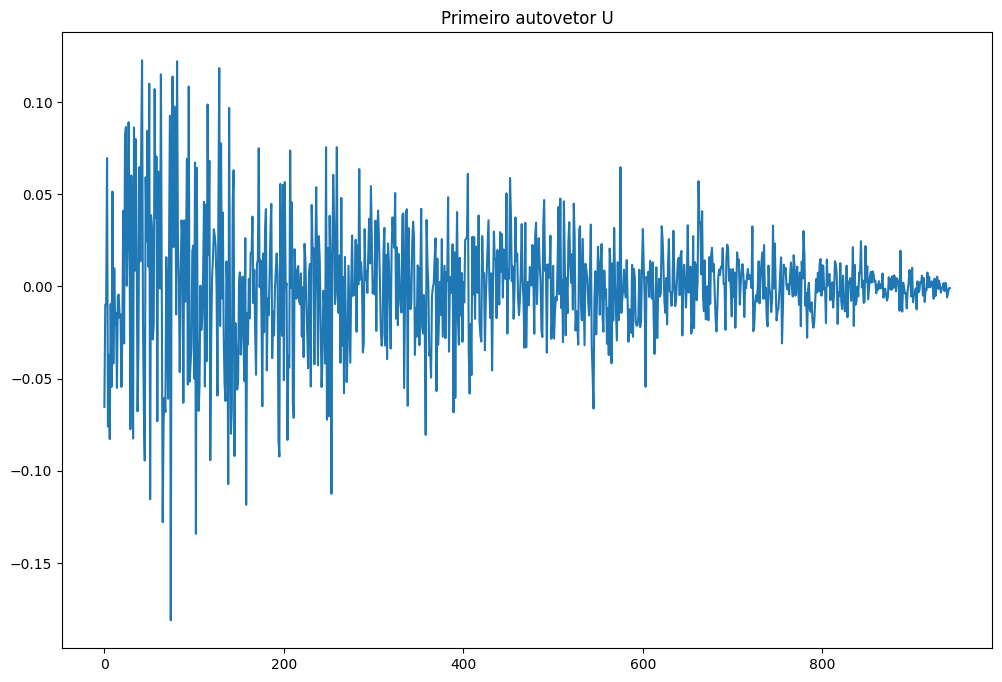

In [14]:
# mostra um mapa de calor dos autovetores U
plt.figure(figsize=(12, 8))
plt.imshow(U, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# mostra um mapa de calor dos autovalores U recortado
plt.figure(figsize=(12, 8))
plt.imshow(U[:10,:10], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(U[0])
plt.title("Primeiro autovetor U")
plt.show()



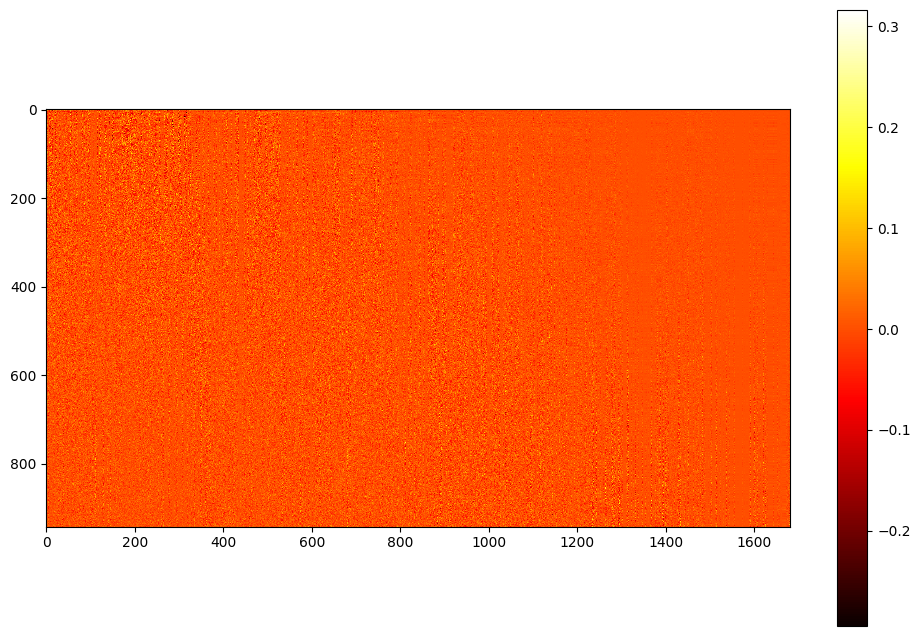

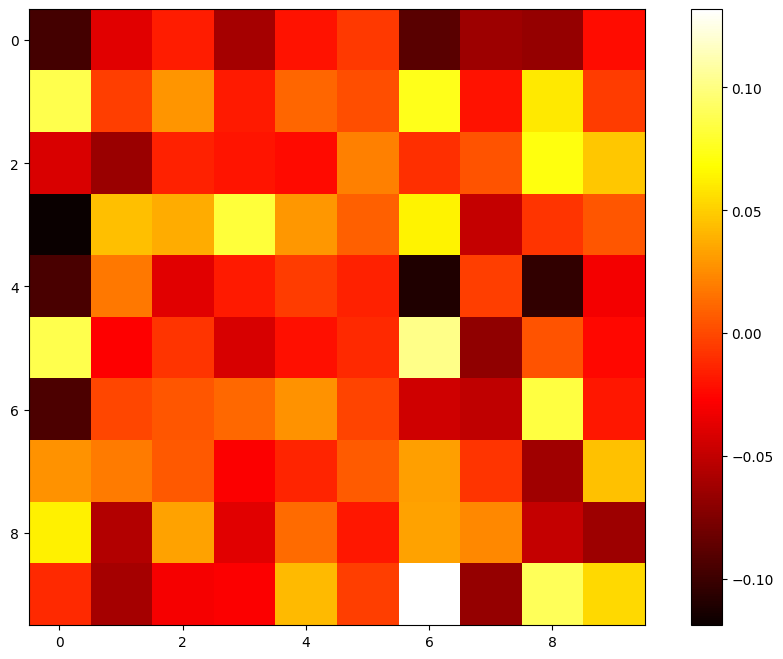

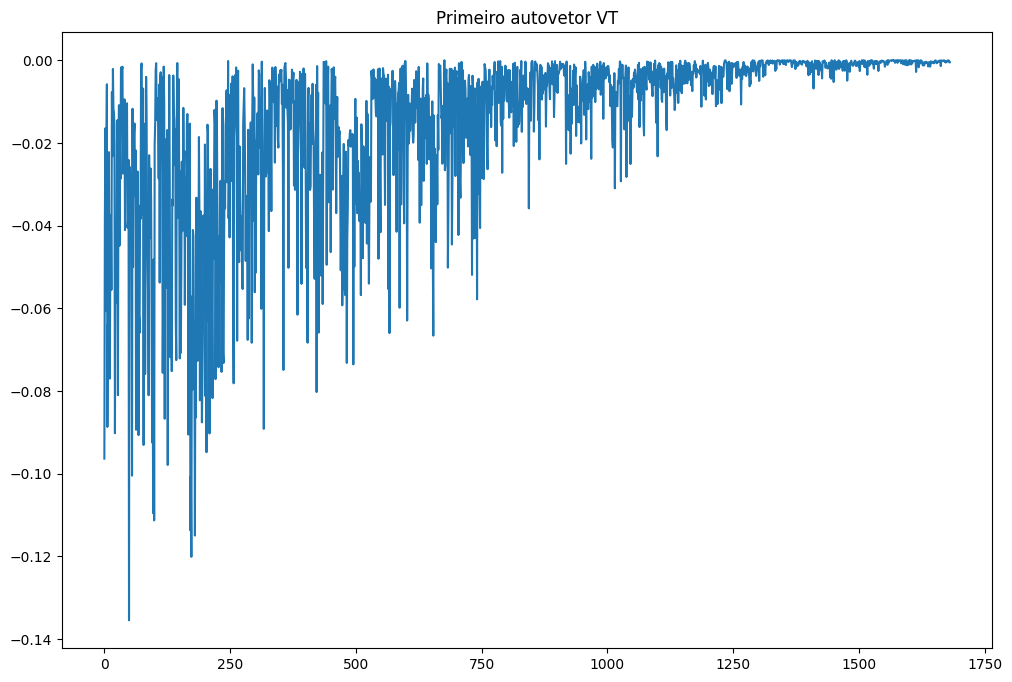

In [15]:
# mostra um mapa de calor dos autovetores VT
plt.figure(figsize=(12, 8))
plt.imshow(VT, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# mostra um mapa de calor dos autovalores VT recortado
plt.figure(figsize=(12, 8))
plt.imshow(VT[:10,:10], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(VT[0])
plt.title("Primeiro autovetor VT")
plt.show()


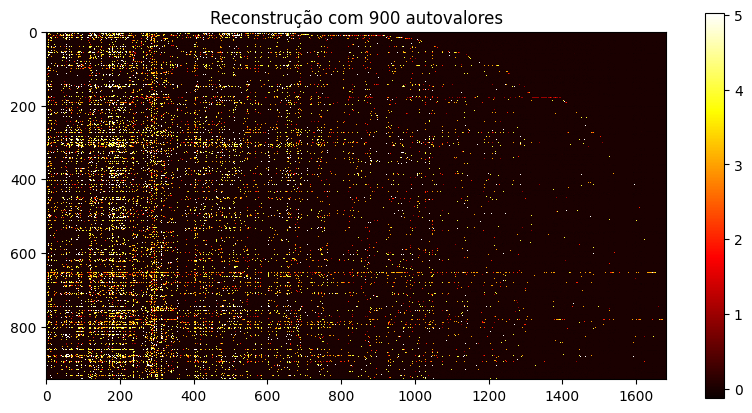

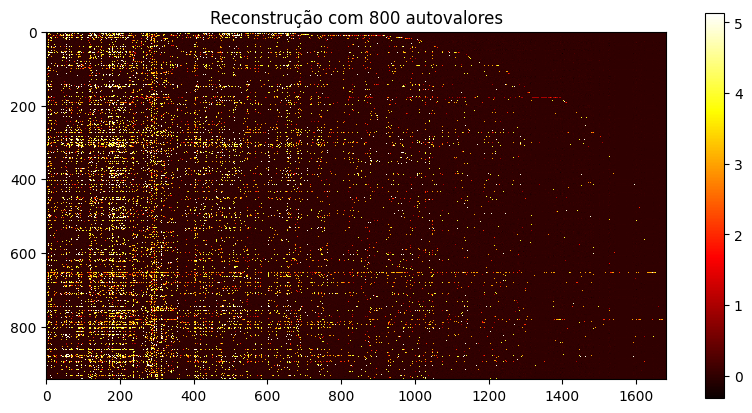

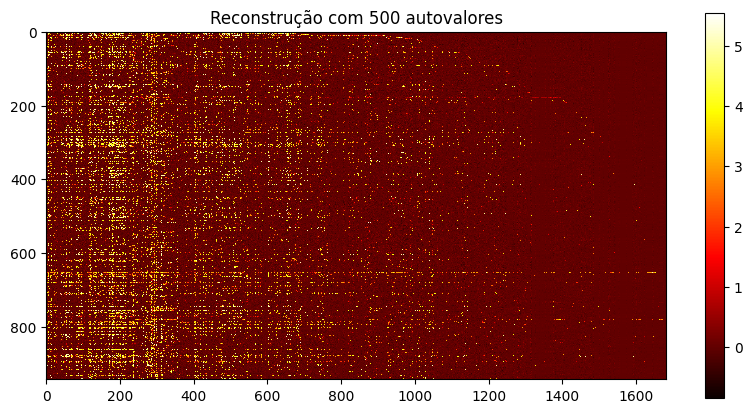

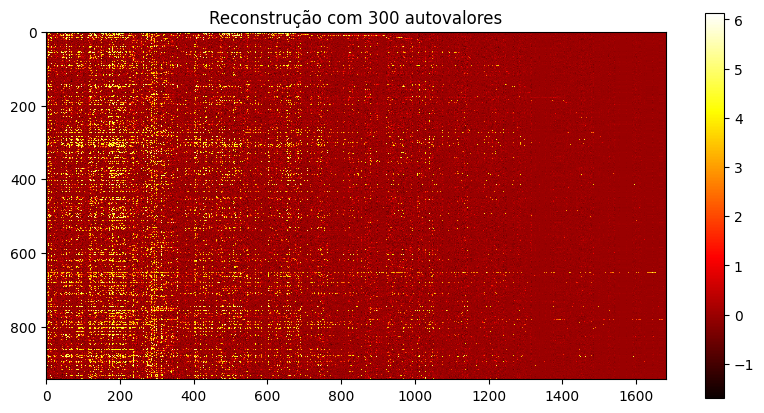

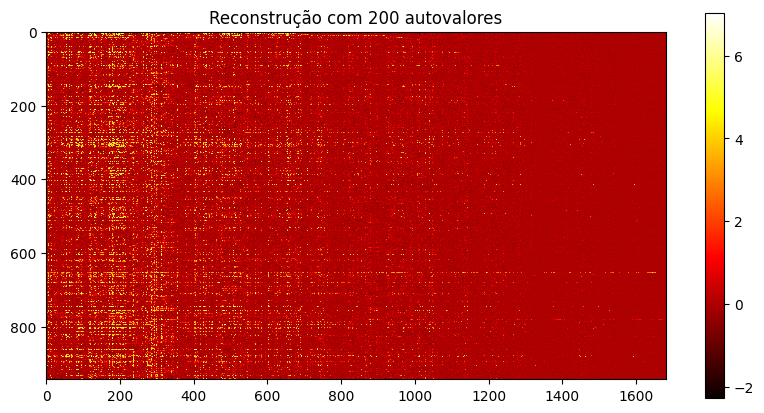

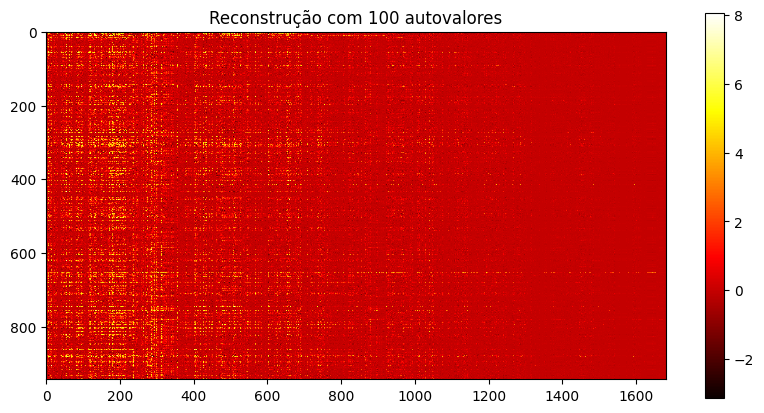

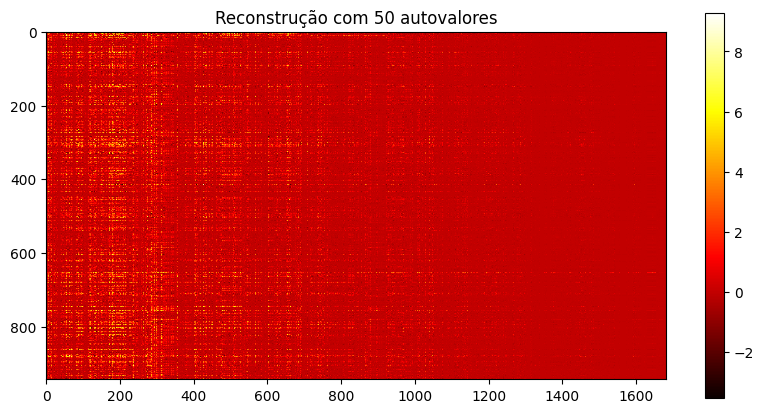

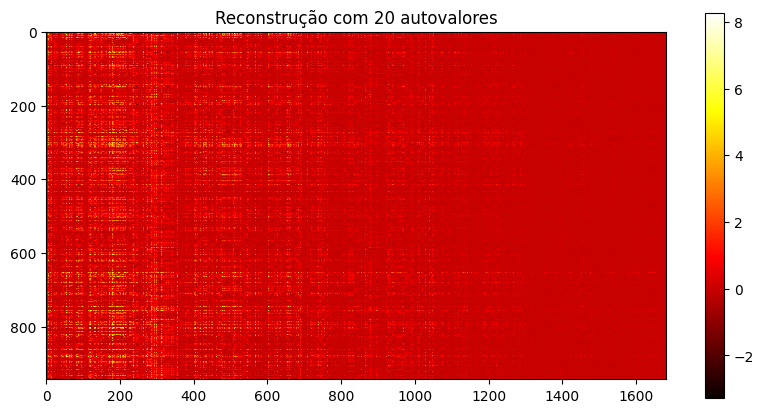

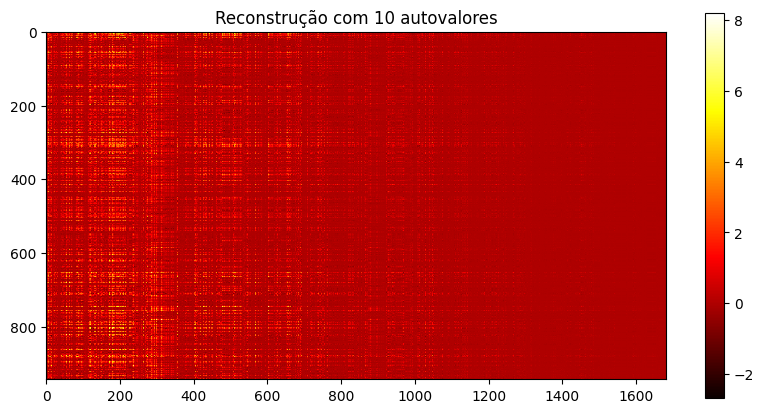

In [16]:
# testa diferetes valores de corte: 800, 500, 200, 100, 50, 20, 10
for corte in [900, 800, 500, 300, 200, 100, 50, 20, 10]:
    # S_10 é S com os primeiros autovalores, o resto é zero
    S_10 = np.zeros_like(S)
    S_10[:corte] = S[:corte]

    # reconstroi a matriz
    reconstructed_10 = U @ jnp.diag(S_10) @ VT

    # mostra a matriz reconstruida
    plt.figure(figsize=(10, 5))
    plt.imshow(reconstructed_10, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Reconstrução com {corte} autovalores")
    plt.show()

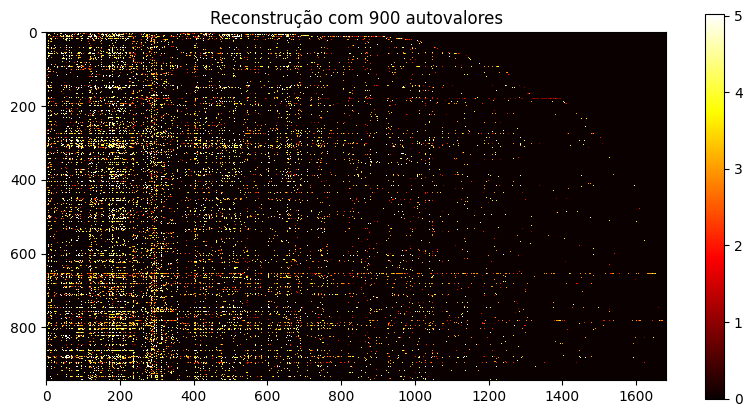

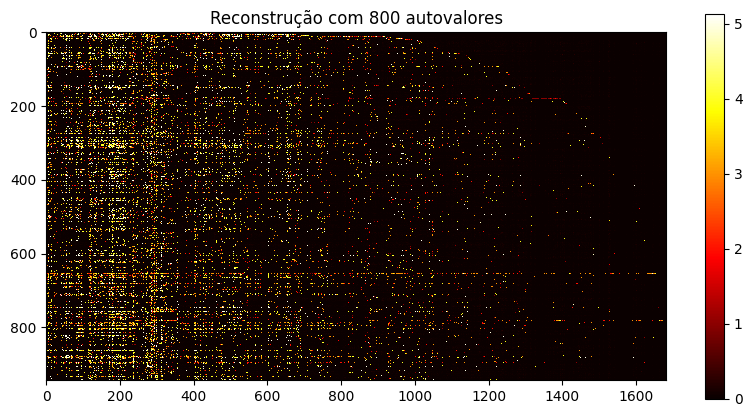

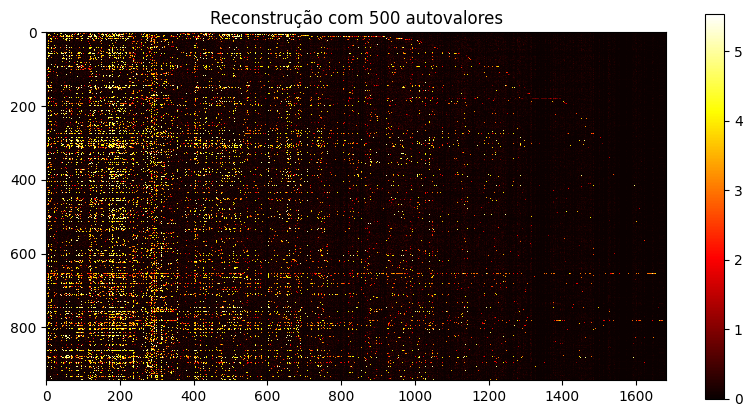

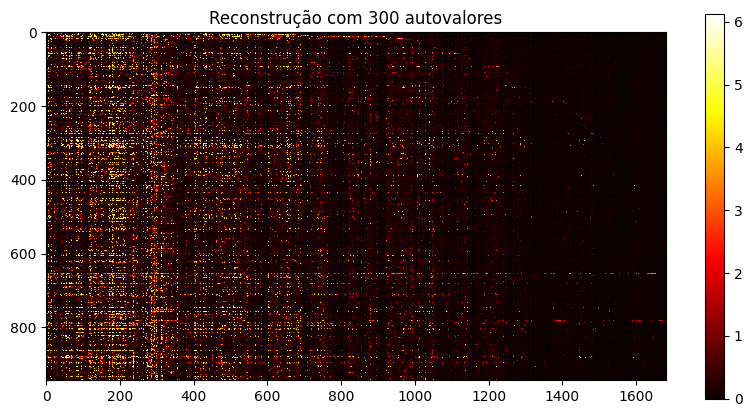

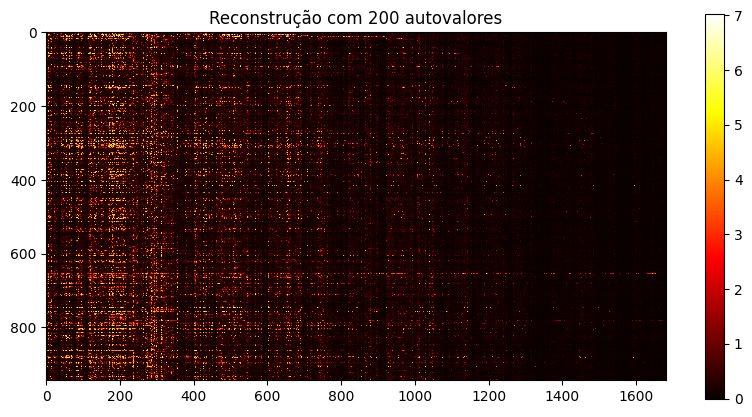

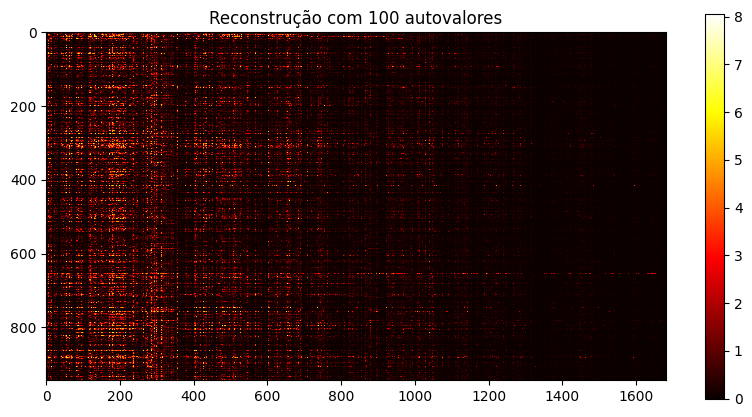

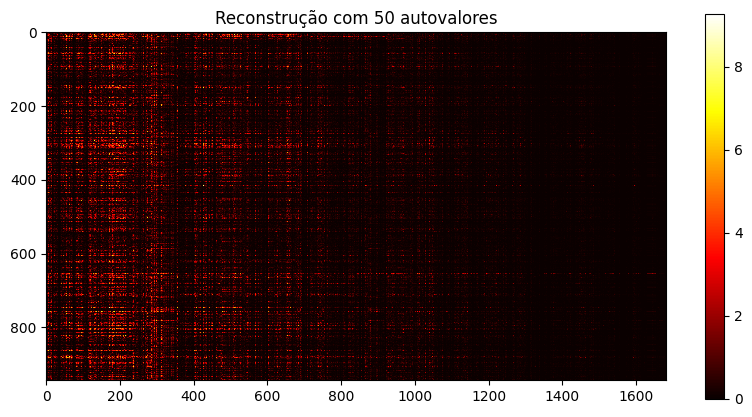

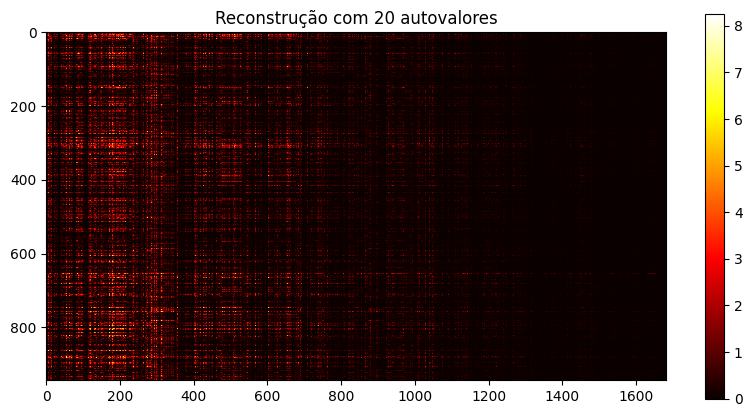

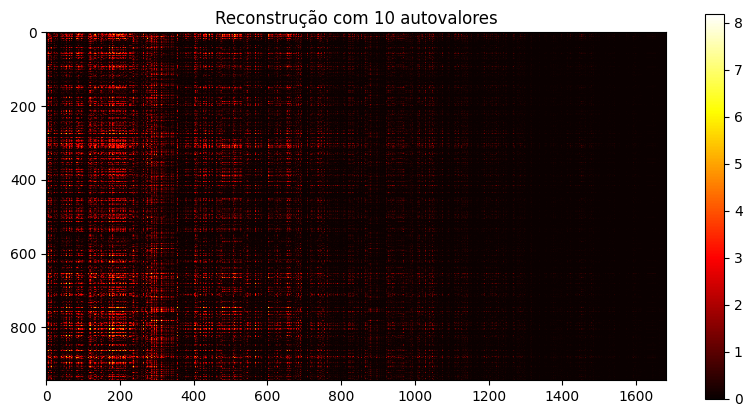

In [17]:
# testa diferetes valores de corte: 800, 500, 200, 100, 50, 20, 10
for corte in [900, 800, 500, 300, 200, 100, 50, 20, 10]:
    # S_10 é S com os primeiros autovalores, o resto é zero
    S_10 = np.zeros_like(S)
    S_10[:corte] = S[:corte]

    # reconstroi a matriz
    reconstructed_10 = jnp.abs(U @ jnp.diag(S_10) @ VT)

    # mostra a matriz reconstruida
    plt.figure(figsize=(10, 5))
    plt.imshow(reconstructed_10, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Reconstrução com {corte} autovalores")
    plt.show()

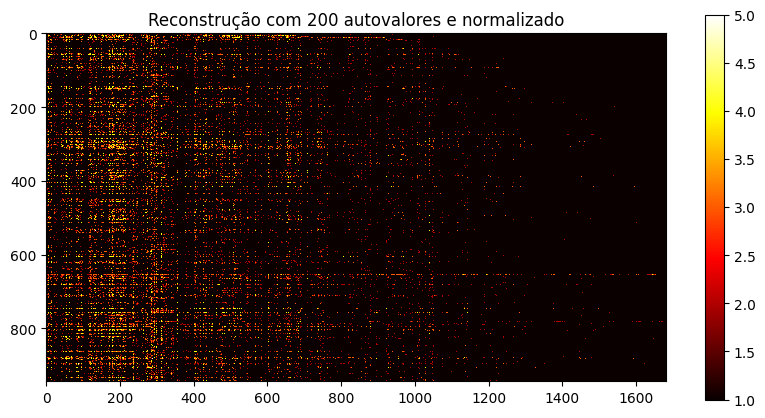

Há  1566126  zeros no dataset de teste
(Array([-4, -3, -2, -1,  0,  1], dtype=int32), Array([   3844,    6604,    5570,    2560, 1567475,      73], dtype=int32))
[[  -4   -3   -2   -1    0    1]
 [3844 6604 5570 2560 1349   73]]
A taxa de acerto foi de  6.7450004 %


In [18]:
# calculo da acuracia com 200 autovetores
S_200 = np.zeros_like(S)
S_200[:200] = S[:200]

reconstructed_20 = jnp.abs(U @ jnp.diag(S_200) @ VT)

# normaliza min max para 1 e 5

reconstructed_20 = 1 + (reconstructed_20 - reconstructed_20.min()) / (reconstructed_20.max() - reconstructed_20.min()) * 4

#arredonda para o inteiro mais próximo
reconstructed_20 = jnp.round(reconstructed_20)

# mostra a matriz reconstruida
plt.figure(figsize=(10, 5))
plt.imshow(reconstructed_20, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title(f"Reconstrução com 200 autovalores e normalizado")
plt.show()

# compara com o dataset de teste

just_test_mask = test_array > 0

sub = reconstructed_20*just_test_mask-test_array

# numero de 0s no dataset de teste
n_zeros_teste = jnp.sum(just_test_mask)
n_zeros_teste = just_test_mask.size - n_zeros_teste
print("Há ", n_zeros_teste, " zeros no dataset de teste")

# vetor das ocorrencias em diferencas
ocorrencias = jnp.unique(jnp.round(sub).astype(int).flatten(), return_counts=True)

print(ocorrencias)


# obtem a posicao do 0 em ocorrencias
i = 0
for i, x in enumerate(ocorrencias[0]):
    if x == 0:
        break

# subtrai os valores de 0

ocorrencias = np.array(ocorrencias)

ocorrencias[1][i] -= n_zeros_teste


ocorrencias = jnp.array(ocorrencias)

print(ocorrencias)

print("A taxa de acerto foi de ", ocorrencias[1][i]/jnp.sum(ocorrencias[1])*100, "%")


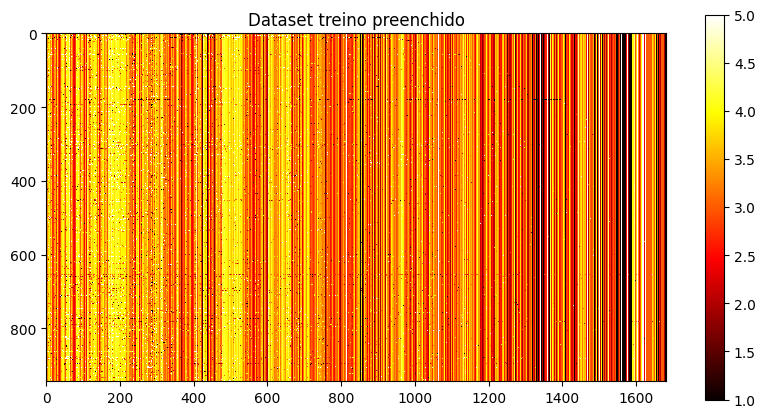

In [19]:
# preencge o treino com a mediana por coluna onde é zero
train_array_filled_vertical = train_array.copy()
train_array_filled_vertical[train_array_filled_vertical == 0] = jnp.nan
train_array_filled_vertical = jnp.where(jnp.isnan(train_array_filled_vertical), jnp.nanmean(train_array_filled_vertical, axis=0), train_array_filled_vertical)

# mostra o dataset treino preenchido
plt.figure(figsize=(10,5))
plt.title("Dataset treino preenchido")
plt.imshow(train_array_filled_vertical, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

Por algum motivo isso aqui trava

In [20]:
# Uv, Sv, VTv = jnp.linalg.svd(train_array_filled_vertical, full_matrices=False)

(943, 1682)


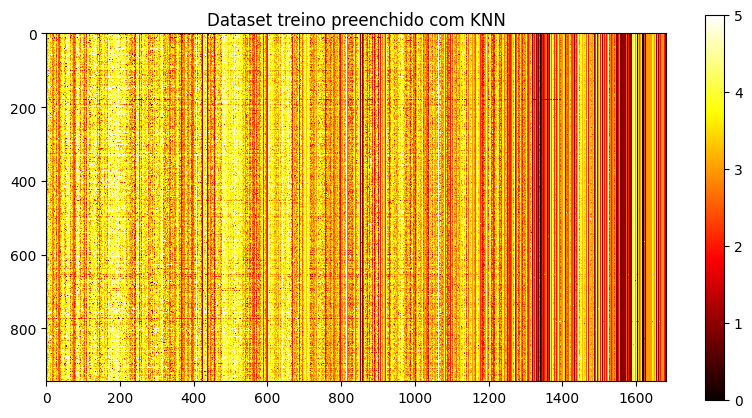

(943, 1682)


In [31]:
# completa os 0s usando knn

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, missing_values=0, keep_empty_features=True)

print(train_array.shape)
train_array_filled_knn = imputer.fit_transform(train_array)



# mostra o dataset treino preenchido
plt.figure(figsize=(10,5))
plt.title("Dataset treino preenchido com KNN")
plt.imshow(train_array_filled_knn, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

print(train_array_filled_knn.shape)

(943, 1682)
(943, 1682)


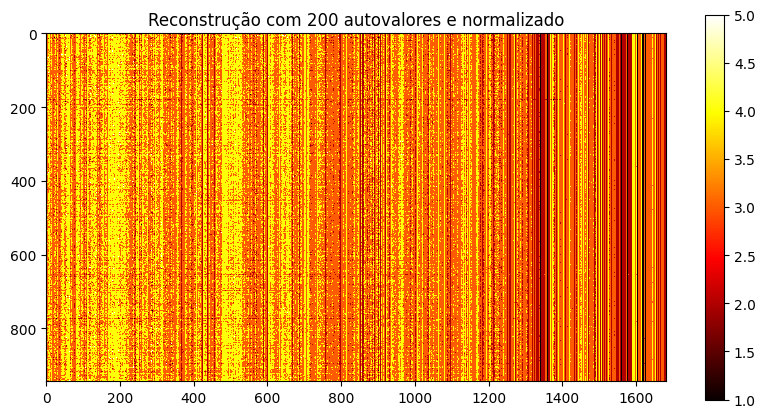

Há  1566126  zeros no dataset de teste
(Array([-3, -2, -1,  0,  1,  2,  3], dtype=int32), Array([     29,    1119,    6205, 1573589,    3659,    1324,     201],      dtype=int32))
[[  -3   -2   -1    0    1    2    3]
 [  29 1119 6205 7463 3659 1324  201]]
A taxa de acerto foi de  37.315002 %


In [38]:
print(train_array_filled_knn.shape)

Uk, Sk, VTk = jnp.linalg.svd(train_array_filled_knn, full_matrices=False)

# reconstroi com 200 autovalores

Sk_200 = np.zeros_like(Sk)
Sk_200[:200] = Sk[:200]

reconstructed_knn_200 = jnp.abs(Uk @ jnp.diag(Sk_200) @ VTk)

print(reconstructed_knn_200.shape)

# normaliza min max para 1 e 5

reconstructed_knn_200 = 1 + (reconstructed_knn_200 - reconstructed_knn_200.min()) / (reconstructed_knn_200.max() - reconstructed_knn_200.min()) * 4

#arredonda para o inteiro mais próximo

reconstructed_knn_200 = jnp.round(reconstructed_knn_200)

# mostra a matriz reconstruida

plt.figure(figsize=(10, 5))
plt.imshow(reconstructed_knn_200, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title(f"Reconstrução com 200 autovalores e normalizado")
plt.show()

# compara com o dataset de teste

just_test_mask = test_array > 0

sub = reconstructed_knn_200*just_test_mask-test_array

# numero de 0s no dataset de teste
n_zeros_teste = jnp.sum(just_test_mask)
n_zeros_teste = just_test_mask.size - n_zeros_teste
print("Há ", n_zeros_teste, " zeros no dataset de teste")

# vetor das ocorrencias em diferencas
ocorrencias = jnp.unique(jnp.round(sub).astype(int).flatten(), return_counts=True)

print(ocorrencias)

# obtem a posicao do 0 em ocorrencias
i = 0
for i, x in enumerate(ocorrencias[0]):
    if x == 0:
        break

# subtrai os valores de 0

ocorrencias = np.array(ocorrencias)

ocorrencias[1][i] -= n_zeros_teste


ocorrencias = jnp.array(ocorrencias)

print(ocorrencias)

print("A taxa de acerto foi de ", ocorrencias[1][i]/jnp.sum(ocorrencias[1])*100, "%")



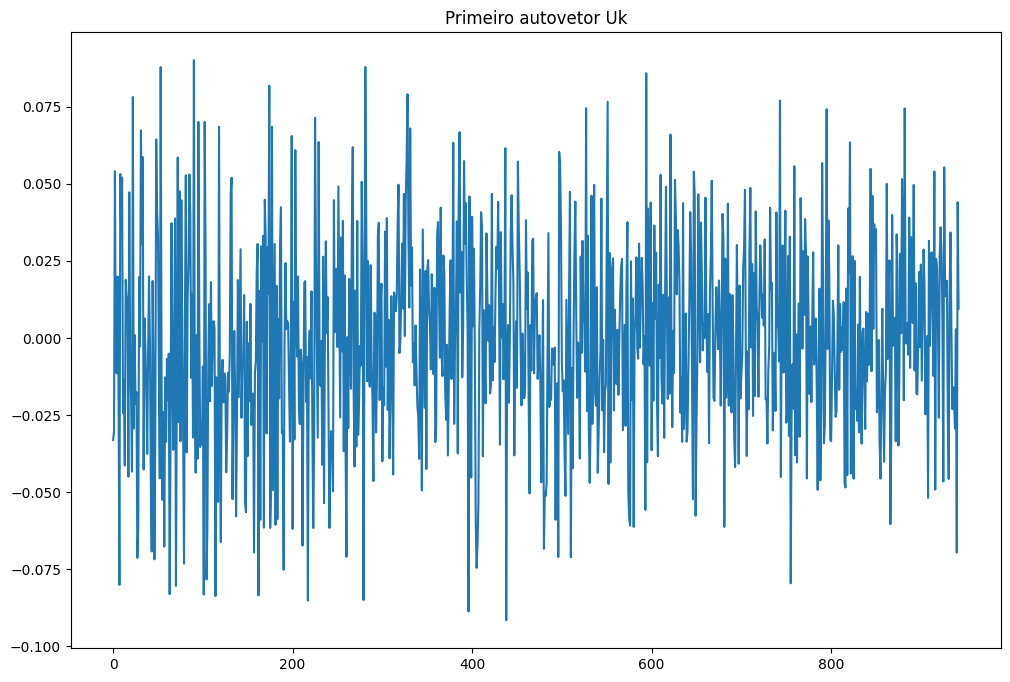

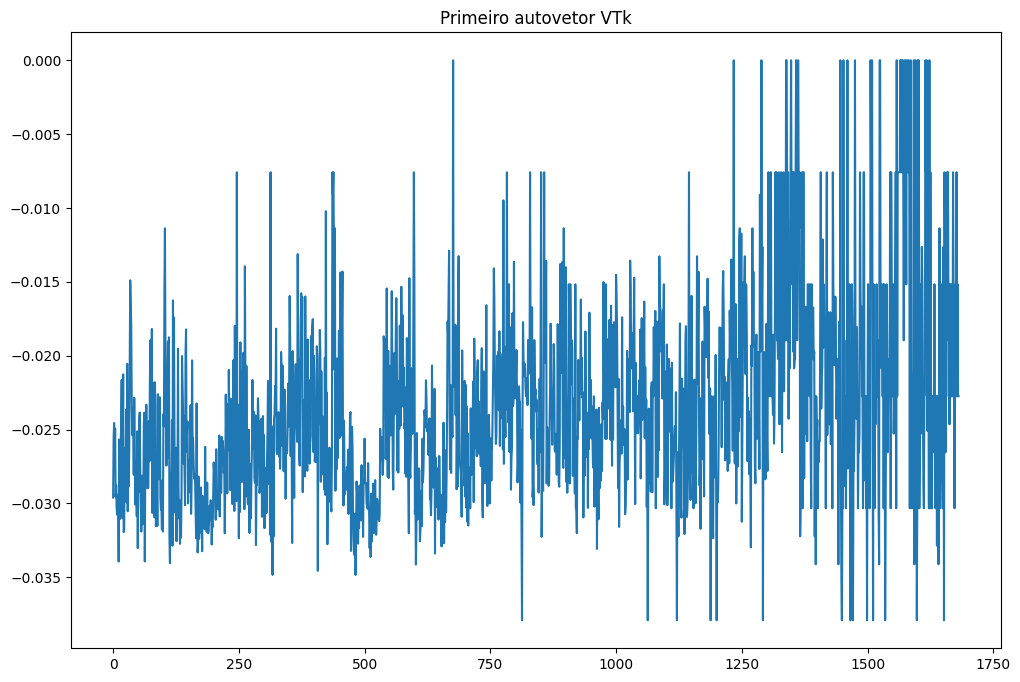

In [35]:
# mostra a primeira linha de U e VT

plt.figure(figsize=(12, 8))
plt.plot(Uk[0])
plt.title("Primeiro autovetor Uk")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(VTk[0])
plt.title("Primeiro autovetor VTk")
plt.show()


Conclusão